In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgba
from sklearn.cluster import KMeans

In [2]:
AS = pd.read_excel('../HCA/dane_autoskalowane.xlsx', index_col='Name')
AS

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_guanido,fr_halogen,fr_hdrzone,fr_methoxy,fr_nitrile,fr_nitro,fr_pyridine,fr_sulfide,fr_thiazole,fr_unbrch_alkane
Name,,,,,,,,,,,,,,,,,,,,,
Mocap,1.347782,1.347782,0.862653,-1.235383,0.173317,-0.209270,-0.643254,-0.835801,-0.632613,-0.395315,...,-0.409447,-0.965678,-0.409447,-0.223607,-0.324893,-0.409447,-0.715219,-0.562731,-0.324893,-0.391441
Frumin,-1.203934,-1.203934,1.237096,-0.815659,-0.727053,-0.207259,0.076173,-0.088799,0.089876,0.028237,...,-0.409447,-0.965678,-0.409447,-0.223607,-0.324893,-0.409447,-0.715219,1.688194,-0.324893,2.740085
Rampart,-1.218679,-1.218679,1.221399,-0.812494,-1.436699,-0.209270,-0.238524,-0.368596,-0.226843,-0.395315,...,-0.409447,-0.965678,-0.409447,-0.223607,-0.324893,-0.409447,-0.715219,1.688194,-0.324893,1.174322
Thiacloprid,-0.018559,-0.018559,0.651244,1.847675,0.241912,1.922567,-0.410288,-0.359092,-0.407378,-0.254131,...,-0.409447,-0.342660,-0.409447,-0.223607,2.924038,-0.409447,1.328264,1.688194,-0.324893,-0.391441
DDT,-0.967335,-0.967335,0.234333,-0.215865,-0.190020,-0.219638,1.872731,2.011433,1.849908,1.016523,...,-0.409447,2.149411,-0.409447,-0.223607,-0.324893,-0.409447,-0.715219,-0.562731,-0.324893,-0.391441
Clopyralid,0.696371,0.696371,-0.904911,0.074214,0.956355,-1.045886,-1.772749,-1.632887,-1.787397,-1.948336,...,-0.409447,0.280358,-0.409447,-0.223607,-0.324893,-0.409447,1.328264,-0.562731,-0.324893,-0.391441
Acetamiprid,-0.075463,-0.075463,0.592181,1.831347,-1.749972,-0.571377,-1.084485,-1.106093,-1.084318,-0.536498,...,-0.409447,-0.342660,-0.409447,-0.223607,2.924038,-0.409447,1.328264,-0.562731,-0.324893,-0.391441
Aminopyralid,0.734162,0.734162,-1.198002,-0.002592,0.908924,-0.973823,-1.435886,-1.306593,-1.448189,-1.524785,...,-0.409447,0.280358,-0.409447,-0.223607,-0.324893,-0.409447,1.328264,-0.562731,-0.324893,-0.391441
Cadusafos,1.512301,1.512301,0.308751,-1.354319,0.007751,1.404266,-0.013859,-0.276208,0.000824,0.451788,...,-0.409447,-0.965678,-0.409447,-0.223607,-0.324893,-0.409447,-0.715219,-0.562731,-0.324893,-0.391441


In [3]:
cor_matrix = pd.DataFrame(np.zeros((AS.shape[1], AS.shape[1])), index=AS.columns, columns=AS.columns)
cor_matrix.shape

(147, 147)

In [4]:
cor_matrix = AS.cov()

In [5]:
cor_matrix

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_guanido,fr_halogen,fr_hdrzone,fr_methoxy,fr_nitrile,fr_nitro,fr_pyridine,fr_sulfide,fr_thiazole,fr_unbrch_alkane
MaxAbsEStateIndex,1.000000,1.000000,-0.457728,-0.127171,0.220945,0.220910,-0.386972,-0.380412,-0.385135,-0.171202,...,0.289678,-0.220094,0.289678,-0.221133,-0.016077,0.289678,0.365426,-0.588487,0.228976,-0.518757
MaxEStateIndex,1.000000,1.000000,-0.457728,-0.127171,0.220945,0.220910,-0.386972,-0.380412,-0.385135,-0.171202,...,0.289678,-0.220094,0.289678,-0.221133,-0.016077,0.289678,0.365426,-0.588487,0.228976,-0.518757
MinAbsEStateIndex,-0.457728,-0.457728,1.000000,-0.222994,-0.457269,0.224740,-0.004721,-0.087877,0.001942,0.031036,...,-0.193359,-0.474498,-0.193359,0.049077,0.212621,-0.193359,-0.350434,0.658221,-0.204675,0.740450
MinEStateIndex,-0.127171,-0.127171,-0.222994,1.000000,0.032874,0.068946,-0.119994,-0.032695,-0.126941,-0.151315,...,0.236435,0.432407,0.236435,-0.050434,0.629099,0.236435,0.472965,-0.169160,0.182622,-0.329156
qed,0.220945,0.220945,-0.457269,0.032874,1.000000,-0.189706,-0.003521,0.066333,-0.011503,-0.168377,...,-0.262819,0.525206,-0.262819,0.253425,-0.257873,-0.262819,0.342509,-0.334595,-0.212927,-0.312077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_nitro,0.289678,0.289678,-0.193359,0.236435,-0.262819,0.493790,-0.051523,-0.028028,-0.048936,0.133870,...,1.000000,-0.147685,1.000000,-0.096374,-0.140028,1.000000,-0.014679,-0.242536,0.793492,-0.168710
fr_pyridine,0.365426,0.365426,-0.350434,0.472965,0.342509,-0.081518,-0.649321,-0.575842,-0.654858,-0.616493,...,-0.014679,0.144064,-0.014679,-0.168345,0.454257,-0.014679,1.000000,-0.181568,-0.244600,-0.294701
fr_sulfide,-0.588487,-0.588487,0.658221,-0.169160,-0.334595,0.181014,-0.087074,-0.150917,-0.080715,-0.117082,...,-0.242536,-0.498209,-0.242536,-0.132453,0.192450,-0.242536,-0.181568,1.000000,-0.192450,0.695608
fr_thiazole,0.228976,0.228976,-0.204675,0.182622,-0.212927,0.291176,-0.002426,0.020367,-0.000288,0.106224,...,0.793492,-0.117187,0.793492,-0.076472,-0.111111,0.793492,-0.244600,-0.192450,1.000000,-0.133870


<Axes: >

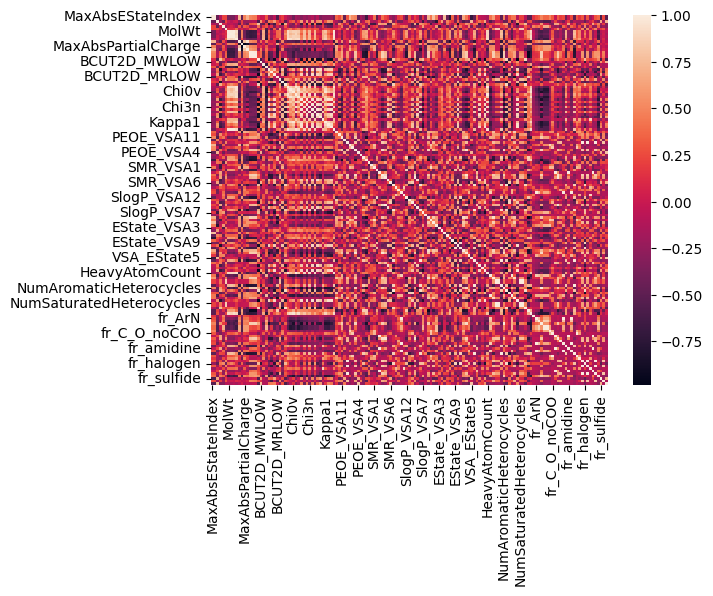

In [6]:
sns.heatmap(cor_matrix)

In [7]:
eig_vals, eig_vects = np.linalg.eig(cor_matrix)

In [8]:
eig_vals

array([ 4.03214830e+01+0.00000000e+00j,  3.15280444e+01+0.00000000e+00j,
        2.30482306e+01+0.00000000e+00j,  1.53903529e+01+0.00000000e+00j,
        8.15446242e+00+0.00000000e+00j,  6.59385200e+00+0.00000000e+00j,
        4.76962266e+00+0.00000000e+00j,  3.86139245e+00+0.00000000e+00j,
        3.24917546e+00+0.00000000e+00j,  2.43111311e+00+0.00000000e+00j,
        1.69971979e+00+0.00000000e+00j,  1.47521448e+00+0.00000000e+00j,
        1.28998670e+00+0.00000000e+00j,  1.18062143e+00+0.00000000e+00j,
        8.60338988e-01+0.00000000e+00j,  6.16711750e-01+0.00000000e+00j,
        2.38223490e-01+0.00000000e+00j,  1.55861681e-01+0.00000000e+00j,
        1.35592710e-01+0.00000000e+00j,  3.08511142e-15+0.00000000e+00j,
       -1.42125519e-16+3.05777105e-15j, -1.42125519e-16-3.05777105e-15j,
        2.57072200e-15+1.36089229e-15j,  2.57072200e-15-1.36089229e-15j,
       -1.63097745e-15+2.26257254e-15j, -1.63097745e-15-2.26257254e-15j,
        3.87751386e-16+2.59436782e-15j,  3.87751386

In [9]:
eig_dict = dict(zip(eig_vals, eig_vects))

In [10]:
eig_dict = {i: eig_dict[i] for i in sorted(eig_vals, reverse=True)}

In [11]:
eig_dict = pd.DataFrame(eig_dict, index=cor_matrix.index).apply(np.real)
eig_dict.columns=[f'PC{i+1}' for i in range(len(eig_dict))]

In [12]:
eig_dict

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147
MaxAbsEStateIndex,-9.029373e-02,-9.029373e-02,7.378629e-02,-6.289385e-02,-3.063208e-02,-3.971615e-03,1.122965e-01,1.002755e-01,1.127891e-01,9.662552e-02,...,1.029375e-01,1.217512e-01,1.016853e-01,-1.434742e-02,1.064271e-01,5.070051e-02,5.925055e-02,1.129844e-01,1.419851e-01,7.849949e-02
MaxEStateIndex,4.844485e-02,4.844485e-02,6.361581e-02,-1.241624e-01,-5.528562e-02,1.463579e-02,-7.506445e-02,-9.257826e-02,-7.317628e-02,-4.503034e-02,...,-1.015420e-01,9.019640e-02,-7.552818e-02,-7.896573e-02,1.233249e-01,-1.446581e-01,-1.339255e-01,-1.398603e-02,-1.485236e-03,-8.436827e-02
MinAbsEStateIndex,1.004026e-02,1.004026e-02,5.792680e-02,4.838961e-02,-1.114119e-01,1.664000e-01,4.679682e-02,3.817050e-02,4.851076e-02,1.060131e-01,...,6.124092e-02,5.924936e-02,-6.933065e-02,1.701116e-01,2.123950e-02,7.936794e-02,7.943080e-02,1.141121e-01,6.283095e-02,8.951476e-02
MinEStateIndex,1.085361e-01,1.085361e-01,-1.338795e-01,-1.043991e-01,7.989559e-02,5.249896e-03,1.149278e-01,1.177723e-01,1.152713e-01,1.351119e-01,...,9.444002e-02,2.616458e-02,-1.001432e-01,4.455653e-02,-3.558431e-03,5.473317e-02,5.890996e-02,8.776580e-02,6.789012e-02,1.403626e-01
qed,8.534992e-02,8.534992e-02,-8.577959e-02,-5.941837e-02,-3.179804e-02,4.983447e-02,7.734399e-03,4.449550e-03,7.511040e-03,-1.964466e-03,...,-7.800163e-03,-7.990502e-03,-1.395839e-02,1.207524e-02,5.188748e-02,-1.560637e-02,-1.018819e-02,-7.850537e-03,1.009238e-02,-1.803502e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_nitro,-1.190776e-16,-3.407452e-17,-4.992100e-18,1.758685e-17,-4.176877e-17,1.738533e-16,4.909662e-17,5.019580e-17,-1.408780e-16,6.924822e-17,...,1.253979e-16,1.978062e-16,7.505325e-17,6.480570e-18,1.038723e-16,2.103094e-16,-2.769929e-16,-6.686666e-17,6.192036e-17,-3.134489e-16
fr_pyridine,-1.541685e-16,-3.995497e-17,-8.925220e-17,-1.500553e-16,2.183429e-17,5.325502e-17,2.040095e-17,-8.834922e-17,1.905204e-17,1.305631e-16,...,-2.828349e-16,6.026286e-18,-1.717883e-16,1.204374e-16,-4.611454e-16,-2.164560e-16,-6.326357e-17,3.758494e-17,-7.240714e-17,2.414119e-17
fr_sulfide,-1.541685e-16,-3.995497e-17,-8.925220e-17,-1.500553e-16,2.183429e-17,5.325502e-17,2.040095e-17,-8.834922e-17,1.905204e-17,1.305631e-16,...,-2.828349e-16,6.026286e-18,-1.717883e-16,1.204374e-16,-4.611454e-16,-2.164560e-16,-6.326357e-17,3.758494e-17,-7.240714e-17,2.414119e-17
fr_thiazole,7.911769e-17,1.196371e-16,7.082169e-17,1.101186e-16,1.331727e-18,-1.530831e-16,-2.095833e-18,1.762683e-16,-2.041691e-16,-2.530937e-16,...,6.876515e-16,6.694439e-16,7.150665e-16,-8.881092e-17,6.387924e-16,8.907290e-16,-1.322121e-16,-2.060902e-16,5.955658e-17,-4.513027e-16


/home/jbozek/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jbozek/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


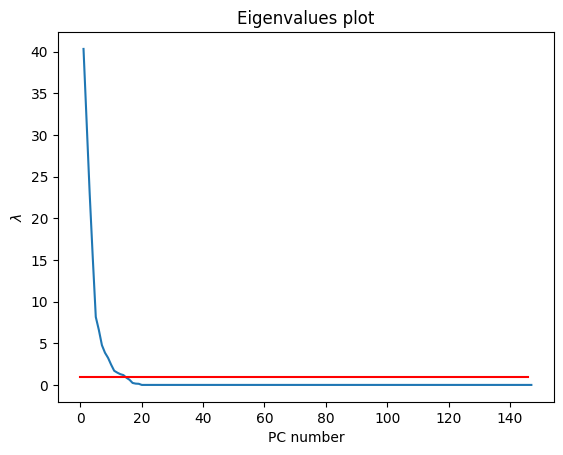

In [13]:
plt.plot(range(1,len(eig_vals)+1), eig_vals)
plt.plot([1 for _ in range(len(eig_vals))], color='red')
plt.title('Eigenvalues plot')
plt.xlabel('PC number')
plt.ylabel(r'$\lambda$')
plt.show()

In [14]:
var_exp = eig_vals/sum(eig_vals) * 100

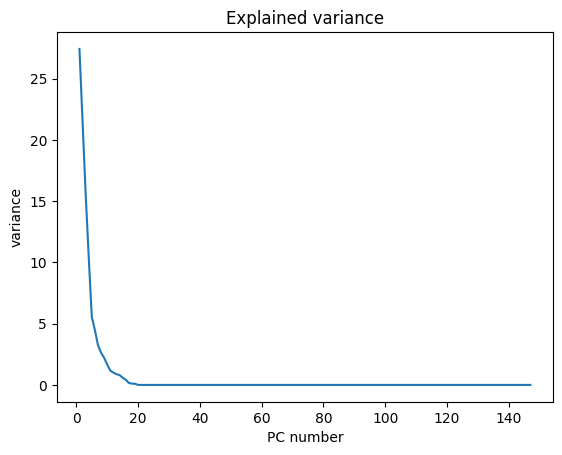

In [15]:
plt.plot(range(1, len(var_exp)+1), var_exp)
plt.title('Explained variance')
plt.xlabel('PC number')
plt.ylabel('variance')
plt.show()

In [16]:
cum_exp_var = np.cumsum(var_exp)

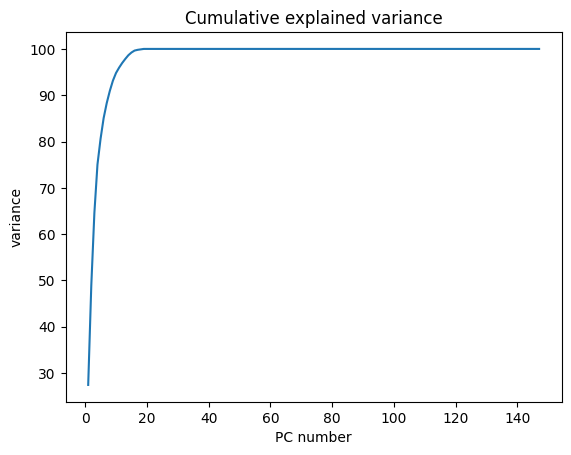

In [17]:
plt.plot(range(1, len(cum_exp_var)+1), cum_exp_var)
plt.title('Cumulative explained variance')
plt.xlabel('PC number')
plt.ylabel('variance')
plt.show()

In [18]:
eig_dict = eig_dict.iloc[:,:3]
eig_vals = np.real(eig_vals)[:3]
eig_vects = np.real(eig_vects)[:,:3]

In [19]:
eig_vects

array([[-0.09029373,  0.04844485,  0.01004026],
       [-0.09029373,  0.04844485,  0.01004026],
       [ 0.07378629,  0.06361581,  0.0579268 ],
       [-0.06289385, -0.12416243,  0.04838961],
       [-0.03063208, -0.05528562, -0.11141194],
       [-0.00397161,  0.01463579,  0.16639999],
       [ 0.11229649, -0.07506445,  0.04679682],
       [ 0.10027548, -0.09257826,  0.0381705 ],
       [ 0.1127891 , -0.07317628,  0.04851076],
       [ 0.09662552, -0.04503034,  0.10601313],
       [-0.08975998,  0.10641498, -0.05950642],
       [ 0.08591338, -0.07320568,  0.02394252],
       [-0.08393864,  0.06143003, -0.03398593],
       [-0.09343834,  0.11804194, -0.04124142],
       [-0.13524155,  0.05427912,  0.07340312],
       [-0.13256673,  0.04931947,  0.08441282],
       [-0.13288305,  0.04329374,  0.08516682],
       [-0.08305108, -0.14986506, -0.00742578],
       [-0.01579583,  0.14184371,  0.01201834],
       [ 0.08407284, -0.01000326,  0.03599997],
       [-0.09469916,  0.00535203, -0.124

In [20]:
eig_dict

,PC1,PC2,PC3
MaxAbsEStateIndex,-9.029373e-02,-9.029373e-02,7.378629e-02
MaxEStateIndex,4.844485e-02,4.844485e-02,6.361581e-02
MinAbsEStateIndex,1.004026e-02,1.004026e-02,5.792680e-02
MinEStateIndex,1.085361e-01,1.085361e-01,-1.338795e-01
qed,8.534992e-02,8.534992e-02,-8.577959e-02
...,...,...,...
fr_nitro,-1.190776e-16,-3.407452e-17,-4.992100e-18
fr_pyridine,-1.541685e-16,-3.995497e-17,-8.925220e-17
fr_sulfide,-1.541685e-16,-3.995497e-17,-8.925220e-17
fr_thiazole,7.911769e-17,1.196371e-16,7.082169e-17


<Axes: >

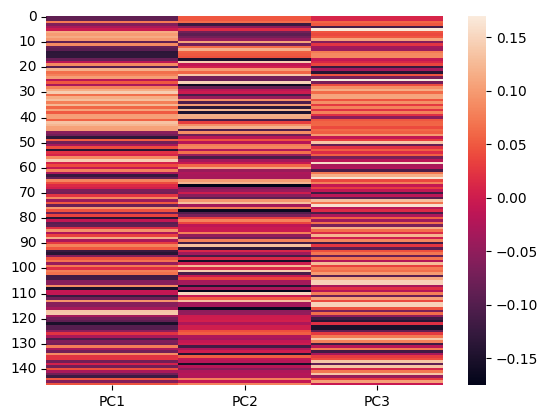

In [21]:
sns.heatmap(eig_vects, yticklabels=10, xticklabels=['PC1', 'PC2', 'PC3'])

In [22]:
m_lad_czynnikowych = eig_vects * np.sqrt(eig_vals)

In [23]:
eig_vects

array([[-0.09029373,  0.04844485,  0.01004026],
       [-0.09029373,  0.04844485,  0.01004026],
       [ 0.07378629,  0.06361581,  0.0579268 ],
       [-0.06289385, -0.12416243,  0.04838961],
       [-0.03063208, -0.05528562, -0.11141194],
       [-0.00397161,  0.01463579,  0.16639999],
       [ 0.11229649, -0.07506445,  0.04679682],
       [ 0.10027548, -0.09257826,  0.0381705 ],
       [ 0.1127891 , -0.07317628,  0.04851076],
       [ 0.09662552, -0.04503034,  0.10601313],
       [-0.08975998,  0.10641498, -0.05950642],
       [ 0.08591338, -0.07320568,  0.02394252],
       [-0.08393864,  0.06143003, -0.03398593],
       [-0.09343834,  0.11804194, -0.04124142],
       [-0.13524155,  0.05427912,  0.07340312],
       [-0.13256673,  0.04931947,  0.08441282],
       [-0.13288305,  0.04329374,  0.08516682],
       [-0.08305108, -0.14986506, -0.00742578],
       [-0.01579583,  0.14184371,  0.01201834],
       [ 0.08407284, -0.01000326,  0.03599997],
       [-0.09469916,  0.00535203, -0.124

In [24]:
m_wart_czynnikowych = AS.dot(eig_vects)

In [25]:
m_wart_czynnikowych.columns = ['PC1', 'PC2', 'PC3']

In [26]:
m_wart_czynnikowych

,PC1,PC2,PC3
Name,,,
Mocap,3.400878,6.539435,-1.135332
Frumin,5.579049,6.151529,0.150662
Rampart,4.674166,6.311870,-0.713085
Thiacloprid,-3.405050,-2.872742,6.219543
DDT,7.698746,-9.020584,-1.910114
Clopyralid,-7.764403,0.687638,-6.451591
Acetamiprid,-3.781472,-1.887770,3.437216
Aminopyralid,-9.204318,0.383047,-7.795439
Cadusafos,5.108119,6.043842,0.364989


In [27]:
pestycydy = {
    'DDT i analogi': ['Methoxychlor', 'DDT', 'DDD', 'DDE'],
    'kwasy pirydynokarboksylowe': ['Triclopyr', 'Clopyralid', 'Aminopyralid', 'Picloram'],
    'neonikotynoidy': ['Thiacloprid', 'Acetamiprid', 'Clothiaridin', 'Imidacloprid', 'Thiamethoxam'],
    'związki organofosforanowe': ['Malathion', 'Veltin', 'Frumin', 'Rampart', 'Terbufos', 'Mocap', 'Cadusafos']
}

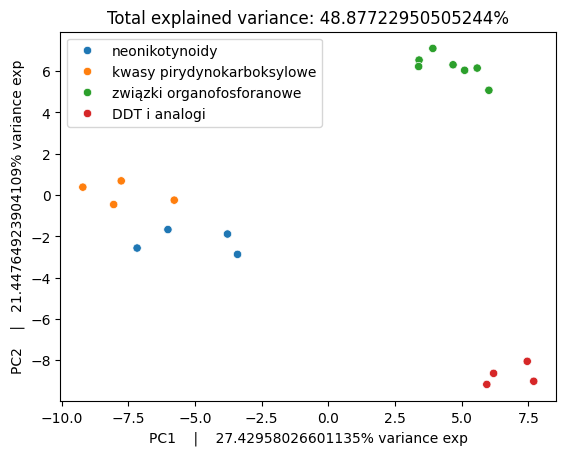

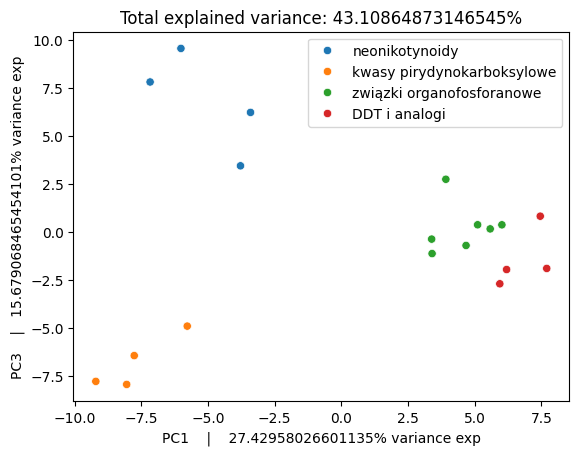

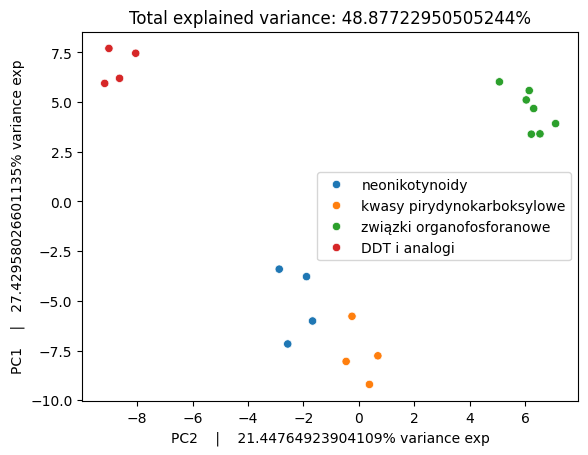

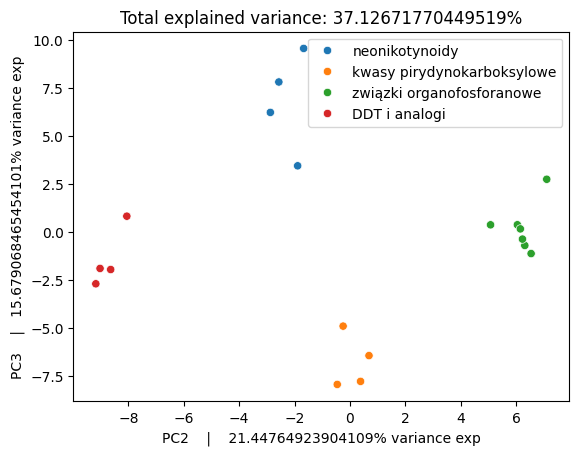

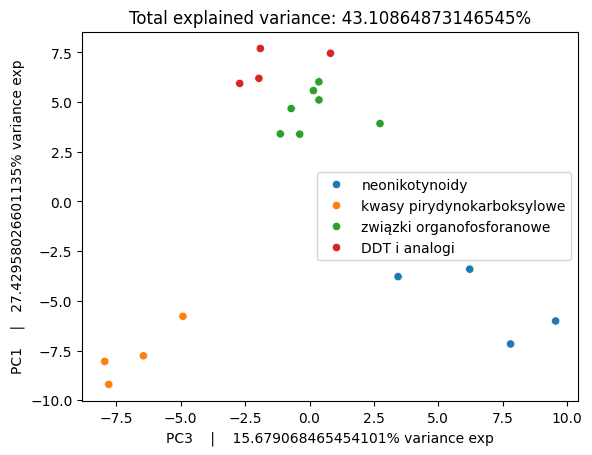

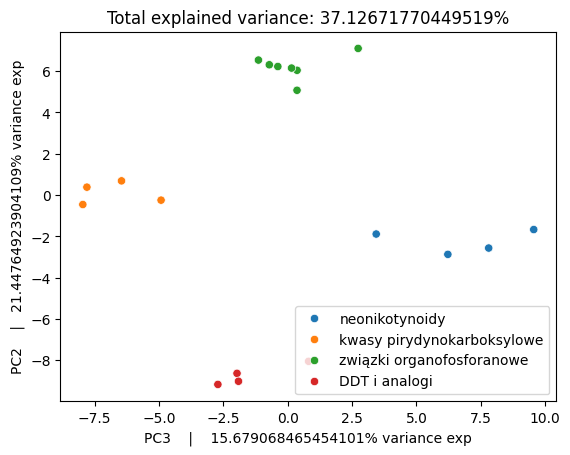

In [28]:
for i in range(len(eig_dict.columns)):
    for j in range(len(eig_dict.columns)):
        if i != j:
            sns.scatterplot(pd.DataFrame([m_wart_czynnikowych.iloc[:,i], m_wart_czynnikowych.iloc[:,j]], index=[m_wart_czynnikowych.columns[i], m_wart_czynnikowych.columns[j]]).T, x=f'PC{i+1}', y=f'PC{j+1}', hue={value: list(pestycydy.keys())[idx] for idx,lista in enumerate(pestycydy.values()) for value in lista})
            plt.xlabel(f'PC{i+1}    |    {np.real(var_exp[i])}% variance exp')
            plt.ylabel(f'PC{j+1}    |   {np.real(var_exp[j])}% variance exp')
            plt.title(f'Total explained variance: {sum([np.real(var_exp[i]), np.real(var_exp[j])])}%')
            plt.legend()
            plt.show()


In [29]:
{value: list(pestycydy.keys())[idx] for idx,lista in enumerate(pestycydy.values()) for value in lista}

{'Methoxychlor': 'DDT i analogi',
 'DDT': 'DDT i analogi',
 'DDD': 'DDT i analogi',
 'DDE': 'DDT i analogi',
 'Triclopyr': 'kwasy pirydynokarboksylowe',
 'Clopyralid': 'kwasy pirydynokarboksylowe',
 'Aminopyralid': 'kwasy pirydynokarboksylowe',
 'Picloram': 'kwasy pirydynokarboksylowe',
 'Thiacloprid': 'neonikotynoidy',
 'Acetamiprid': 'neonikotynoidy',
 'Clothiaridin': 'neonikotynoidy',
 'Imidacloprid': 'neonikotynoidy',
 'Thiamethoxam': 'neonikotynoidy',
 'Malathion': 'związki organofosforanowe',
 'Veltin': 'związki organofosforanowe',
 'Frumin': 'związki organofosforanowe',
 'Rampart': 'związki organofosforanowe',
 'Terbufos': 'związki organofosforanowe',
 'Mocap': 'związki organofosforanowe',
 'Cadusafos': 'związki organofosforanowe'}

In [30]:
m_lad_czynnikowych

array([[-0.57335795,  0.27201708,  0.04820188],
       [-0.57335795,  0.27201708,  0.04820188],
       [ 0.46853703,  0.35720177,  0.2780983 ],
       [-0.3993709 , -0.69717003,  0.23231163],
       [-0.19451125, -0.31042789, -0.53487281],
       [-0.02521944,  0.08217975,  0.7988626 ],
       [ 0.71307373, -0.42148565,  0.22466486],
       [ 0.63674124, -0.51982545,  0.18325115],
       [ 0.71620174, -0.41088365,  0.23289324],
       [ 0.61356432, -0.25284466,  0.50895391],
       [-0.5699687 ,  0.59751842, -0.28568181],
       [ 0.5455431 , -0.41104874,  0.11494463],
       [-0.53300362,  0.34492866, -0.16316161],
       [-0.59332597,  0.66280358, -0.19799419],
       [-0.85877303,  0.30477641,  0.3523979 ],
       [-0.84178815,  0.27692803,  0.40525391],
       [-0.84379676,  0.24309365,  0.40887376],
       [-0.52736769, -0.84148989, -0.03565012],
       [-0.10030224,  0.79645014,  0.05769832],
       [ 0.53385583, -0.05616817,  0.17283071],
       [-0.60133205,  0.03005155, -0.595

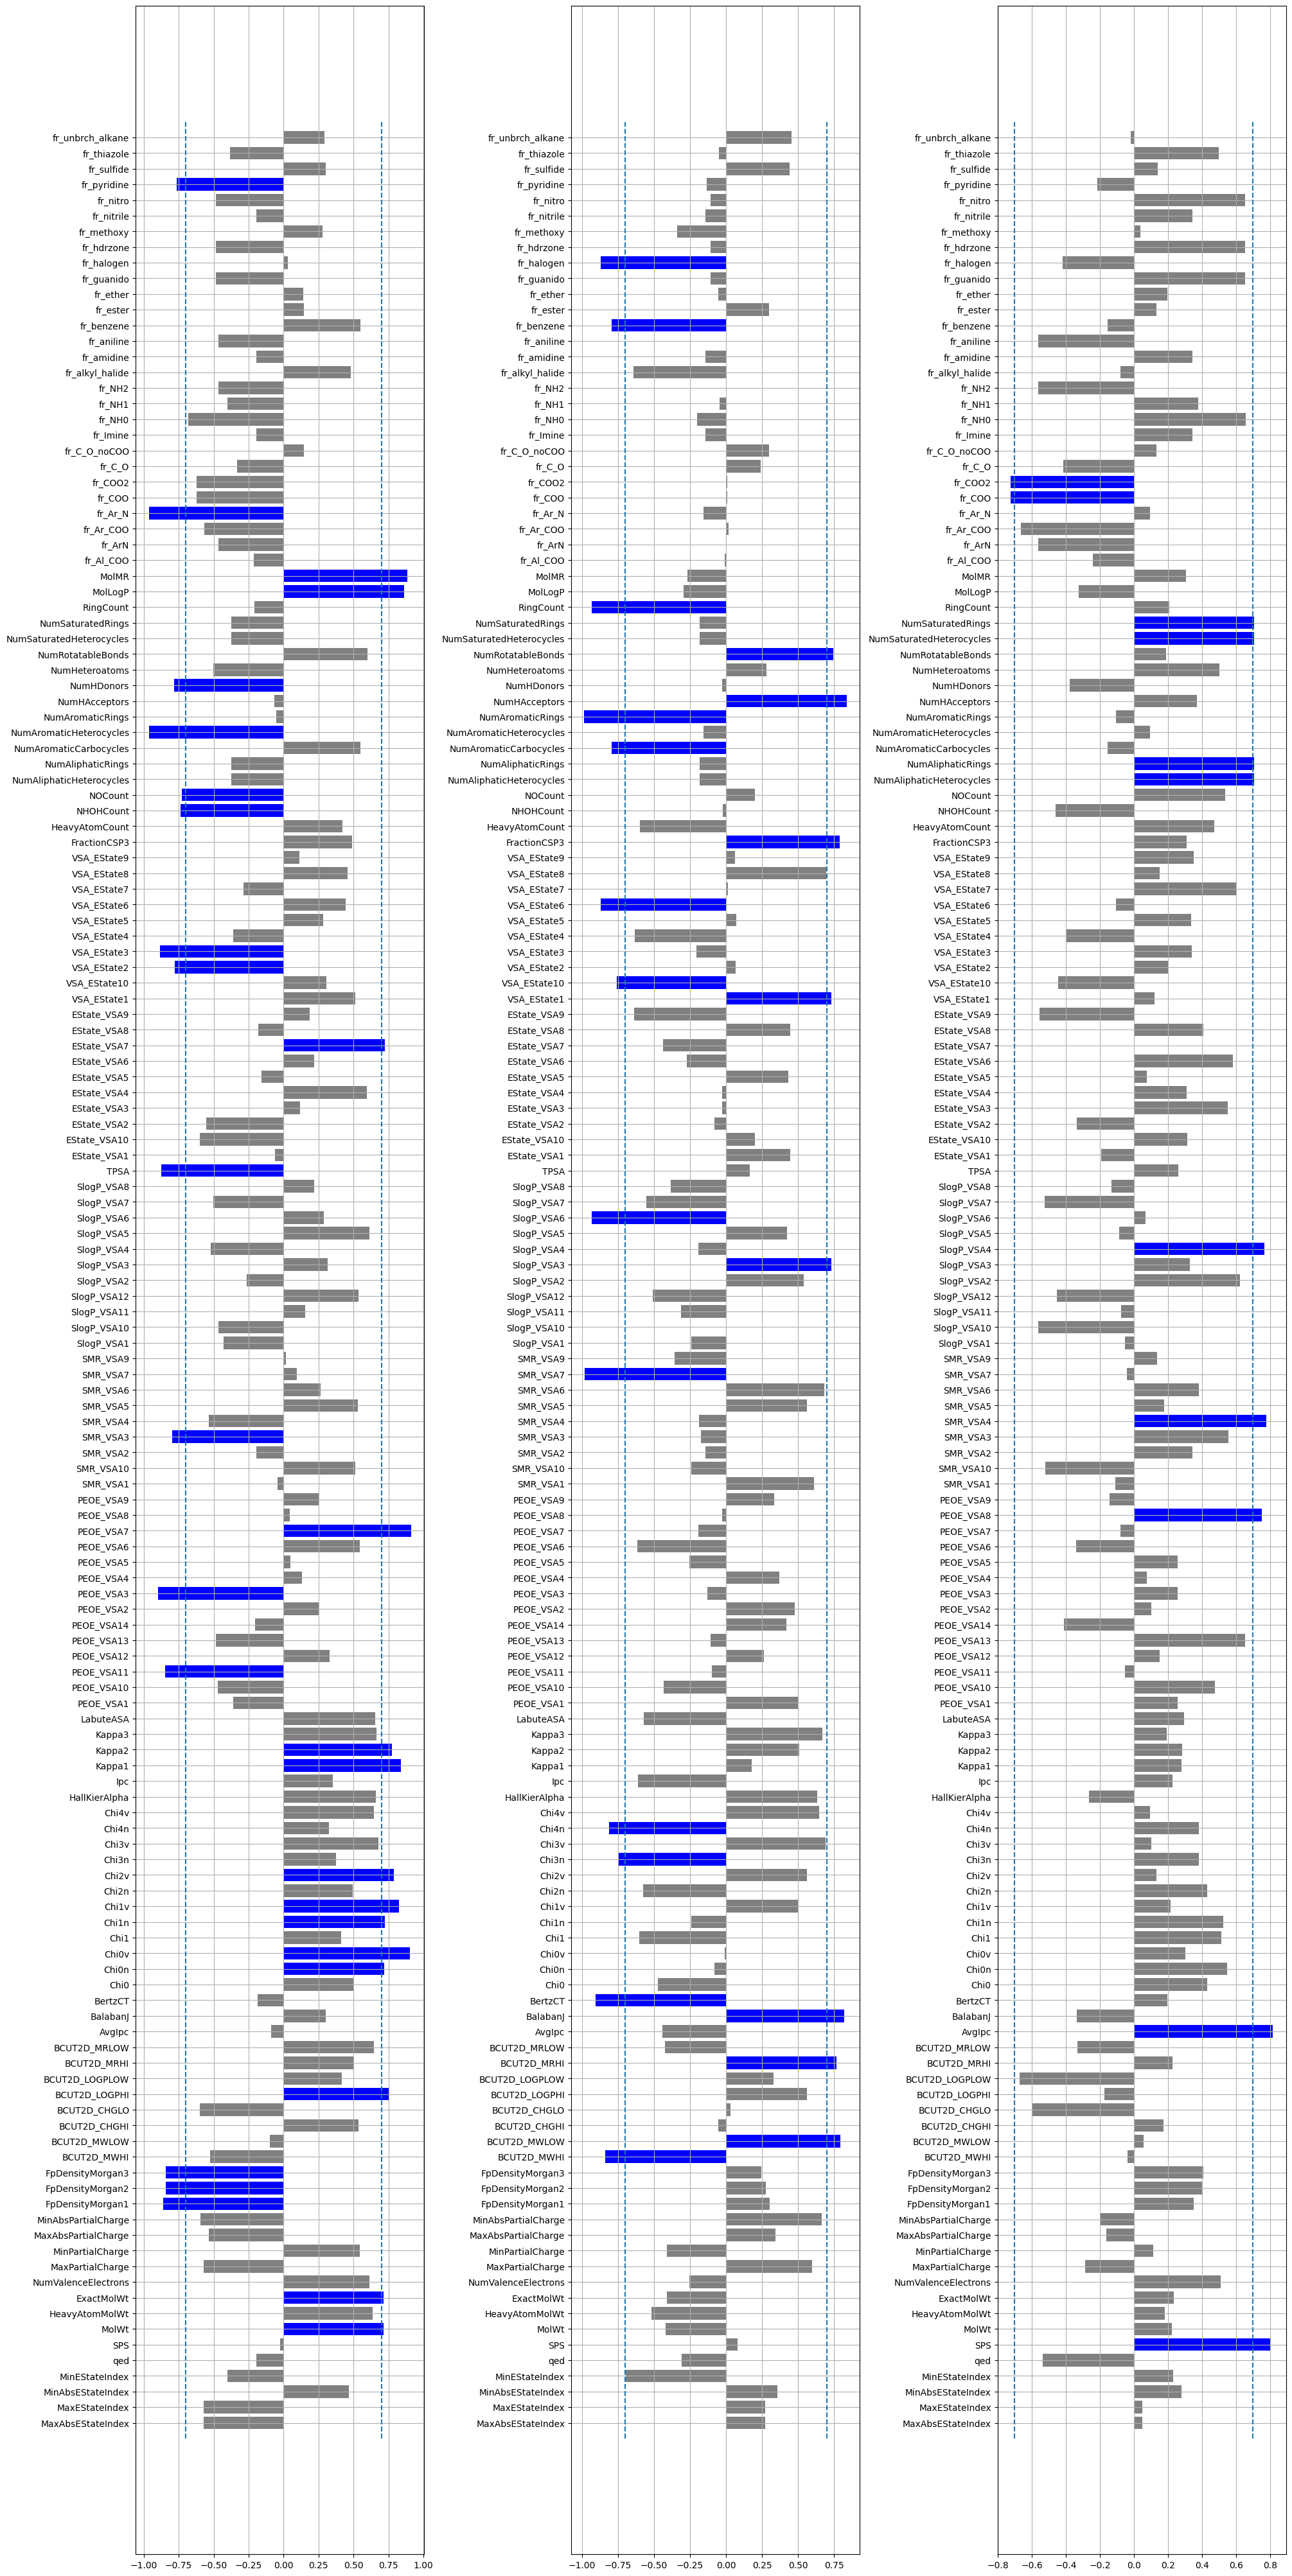

In [31]:
fig, ax = plt.subplots(1,3, constrained_layout=True)
fig.set_size_inches((20,40))

for i in range(3):
    ax[i].barh(AS.columns, m_lad_czynnikowych[:,i], color=['b' if np.abs(m_lad_czynnikowych[j,i]) > 0.7 else 'grey' for j in range(m_lad_czynnikowych.shape[0])])
    ax[i].vlines([-0.7,0.7], -1, 147, linestyles='dashed')
    ax[i].grid()


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(3)
m_lad_czynnikowych = pca.fit(AS)
x_pca = pd.DataFrame(pca.transform(AS), columns=[f'PC{i+1}' for i in range(3)], index=AS.index)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


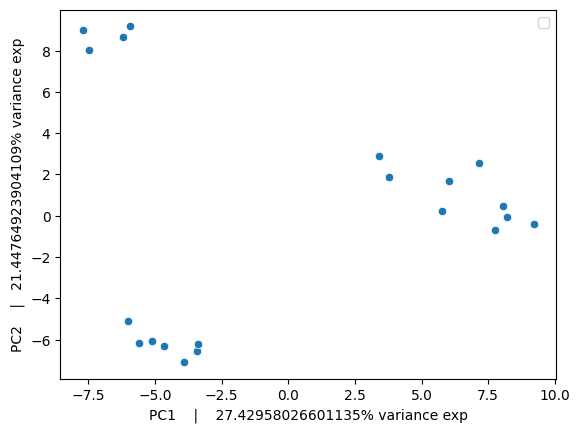

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


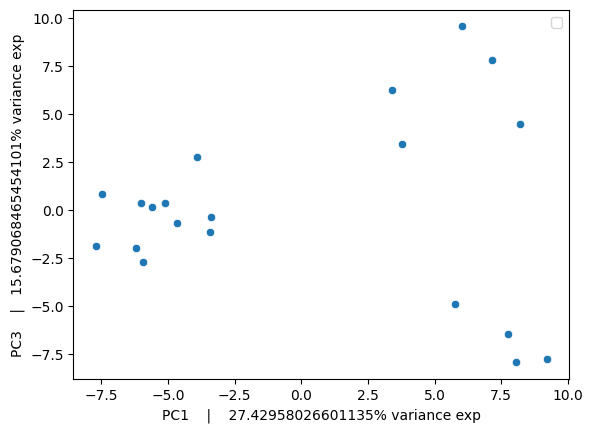

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


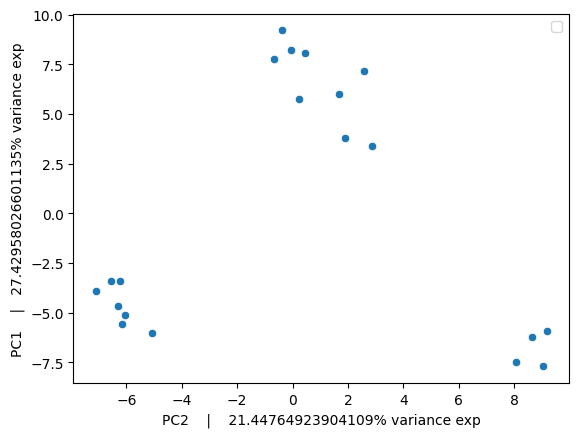

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


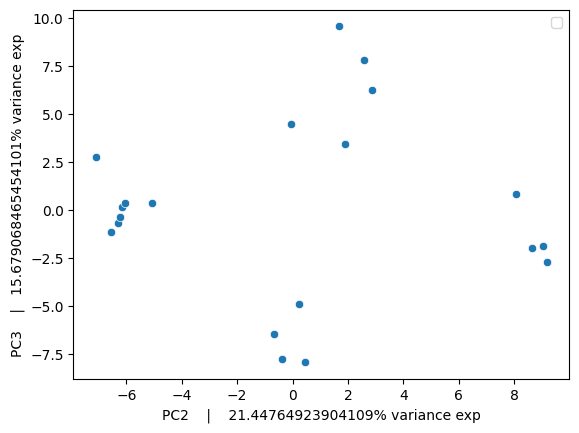

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


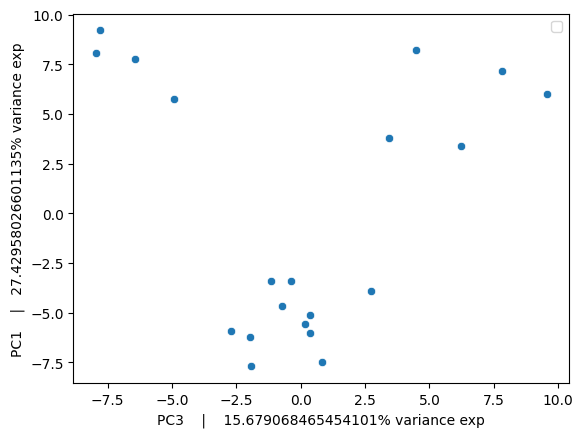

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


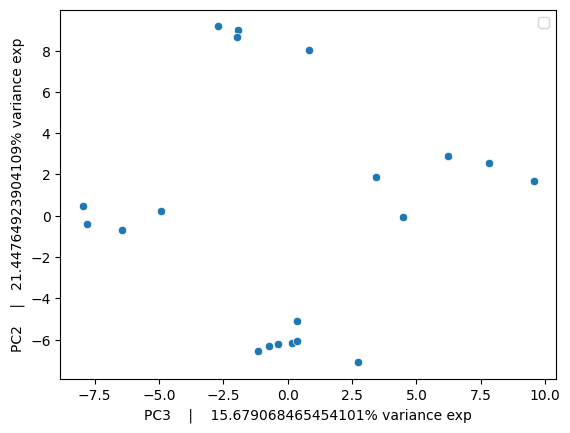

In [34]:
for i in range(len(eig_dict.columns)):
    for j in range(len(eig_dict.columns)):
        if i != j:
            sns.scatterplot(pd.DataFrame([x_pca.iloc[:,i], x_pca.iloc[:,j]]).T, x=f'PC{i+1}', y=f'PC{j+1}')
            plt.xlabel(f'PC{i+1}    |    {np.real(var_exp[i])}% variance exp')
            plt.ylabel(f'PC{j+1}    |   {np.real(var_exp[j])}% variance exp')
            plt.legend()
            plt.show()